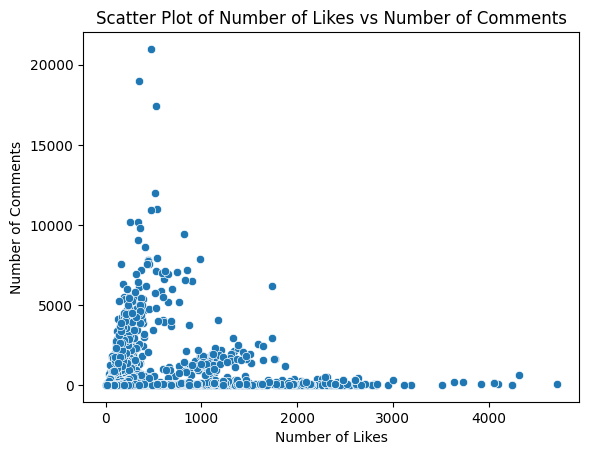

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data_path = '/content/Live.csv'
music_data = pd.read_csv(data_path)

# Plot two features to find potential clusters
sns.scatterplot(x='num_likes', y='num_comments', data=music_data)
plt.title('Scatter Plot of Number of Likes vs Number of Comments')
plt.xlabel('Number of Likes')
plt.ylabel('Number of Comments')
plt.show()


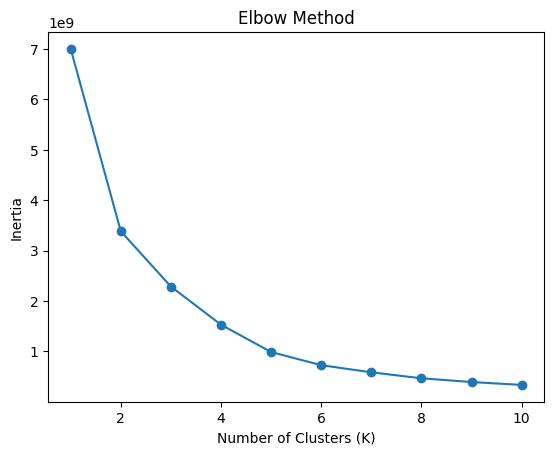

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
data_path = '/content/Live.csv'
music_data = pd.read_csv(data_path)

# Selecting the features for clustering
X = music_data[['num_likes', 'num_comments']]

# Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


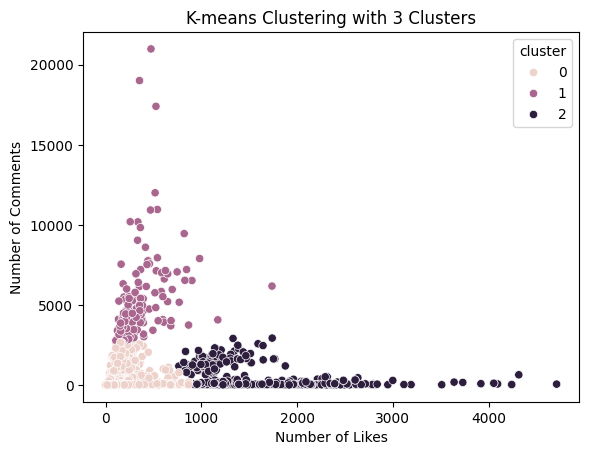

In [6]:
# Chosen optimal number of clusters (K)
optimal_k = 3

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
music_data['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
sns.scatterplot(x='num_likes', y='num_comments', hue='cluster', data=music_data)
plt.title('K-means Clustering with {} Clusters'.format(optimal_k))
plt.xlabel('Number of Likes')
plt.ylabel('Number of Comments')
plt.show()
